In [1]:
pip install lucifer-ml


     |████████████████████████████████| 43 kB 774 kB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
     |████████████████████████████████| 308 kB 66.4 MB/s 
     |████████████████████████████████| 564 kB 47.6 MB/s 
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 210 kB 50.6 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 146 kB 58.2 MB/s 
     |████████████████████████████████| 113 kB 53.8 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 462 kB 61.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=926e907174ad9c7c9e452161c6d9fdd6b60267dd6253851ec7a92ea742cf2e98
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# **Importing Essential Libraries, Metrics, Tools and Models**
```



In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Loading the **Data**

In [24]:
dataset = pd.read_csv('/content/water_potability.csv')

# Exploratory Data Analysis

5 baris pertama dari dataset

In [25]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [18]:
dataset.shape

(3276, 10)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


mendapatkan ringkasan statistik dari dataset

In [28]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [29]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

*memvisualisasikan nilai yang hilang*


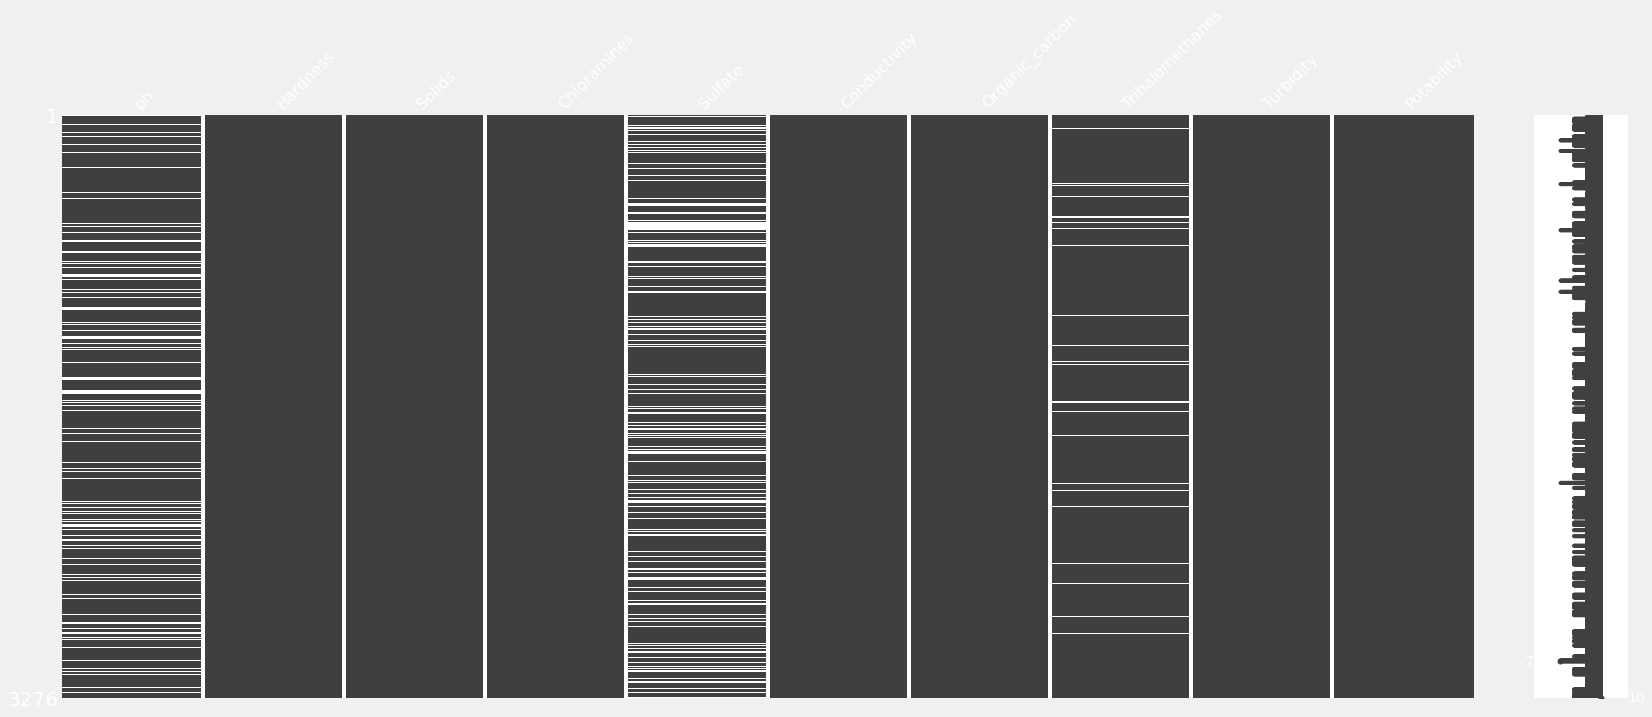

In [30]:
msno.matrix(dataset)


Menghubungkan nilai yang hilang dengan nilai rata-rata kolom tertentu dengan "Potabilitas". Ini berarti bahwa jika ada nilai yang hilang dalam satu baris dan baris tersebut memiliki nilai "Potabilitas" 1, itu diperhitungkan dengan nilai rata-rata grup di kolom tertentu di mana semua baris memiliki nilai "Potabilitas" 1. Jika baris itu memiliki nilai "Potabilitas" 0, maka itu diperhitungkan dengan nilai rata-rata grup di kolom tertentu di mana semua baris memiliki nilai "Potabilitas" 0.

In [32]:
dataset['ph'] = dataset['ph'].fillna(dataset.groupby(['Potability'])['ph'].transform('mean'))
dataset['Sulfate'] = dataset['Sulfate'].fillna(dataset.groupby(['Potability'])['Sulfate'].transform('mean'))
dataset['Trihalomethanes'] = dataset['Trihalomethanes'].fillna(dataset.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [33]:
dataset.duplicated().sum()

0

# **Data Visualization**


Memvisualisasikan Korelasi antara sepuluh variabel bernilai real numerik menggunakan visualisasi pairplot.

Biru ---> Tidak Dapat Diminum
Oranye ---> Dapat Diminum

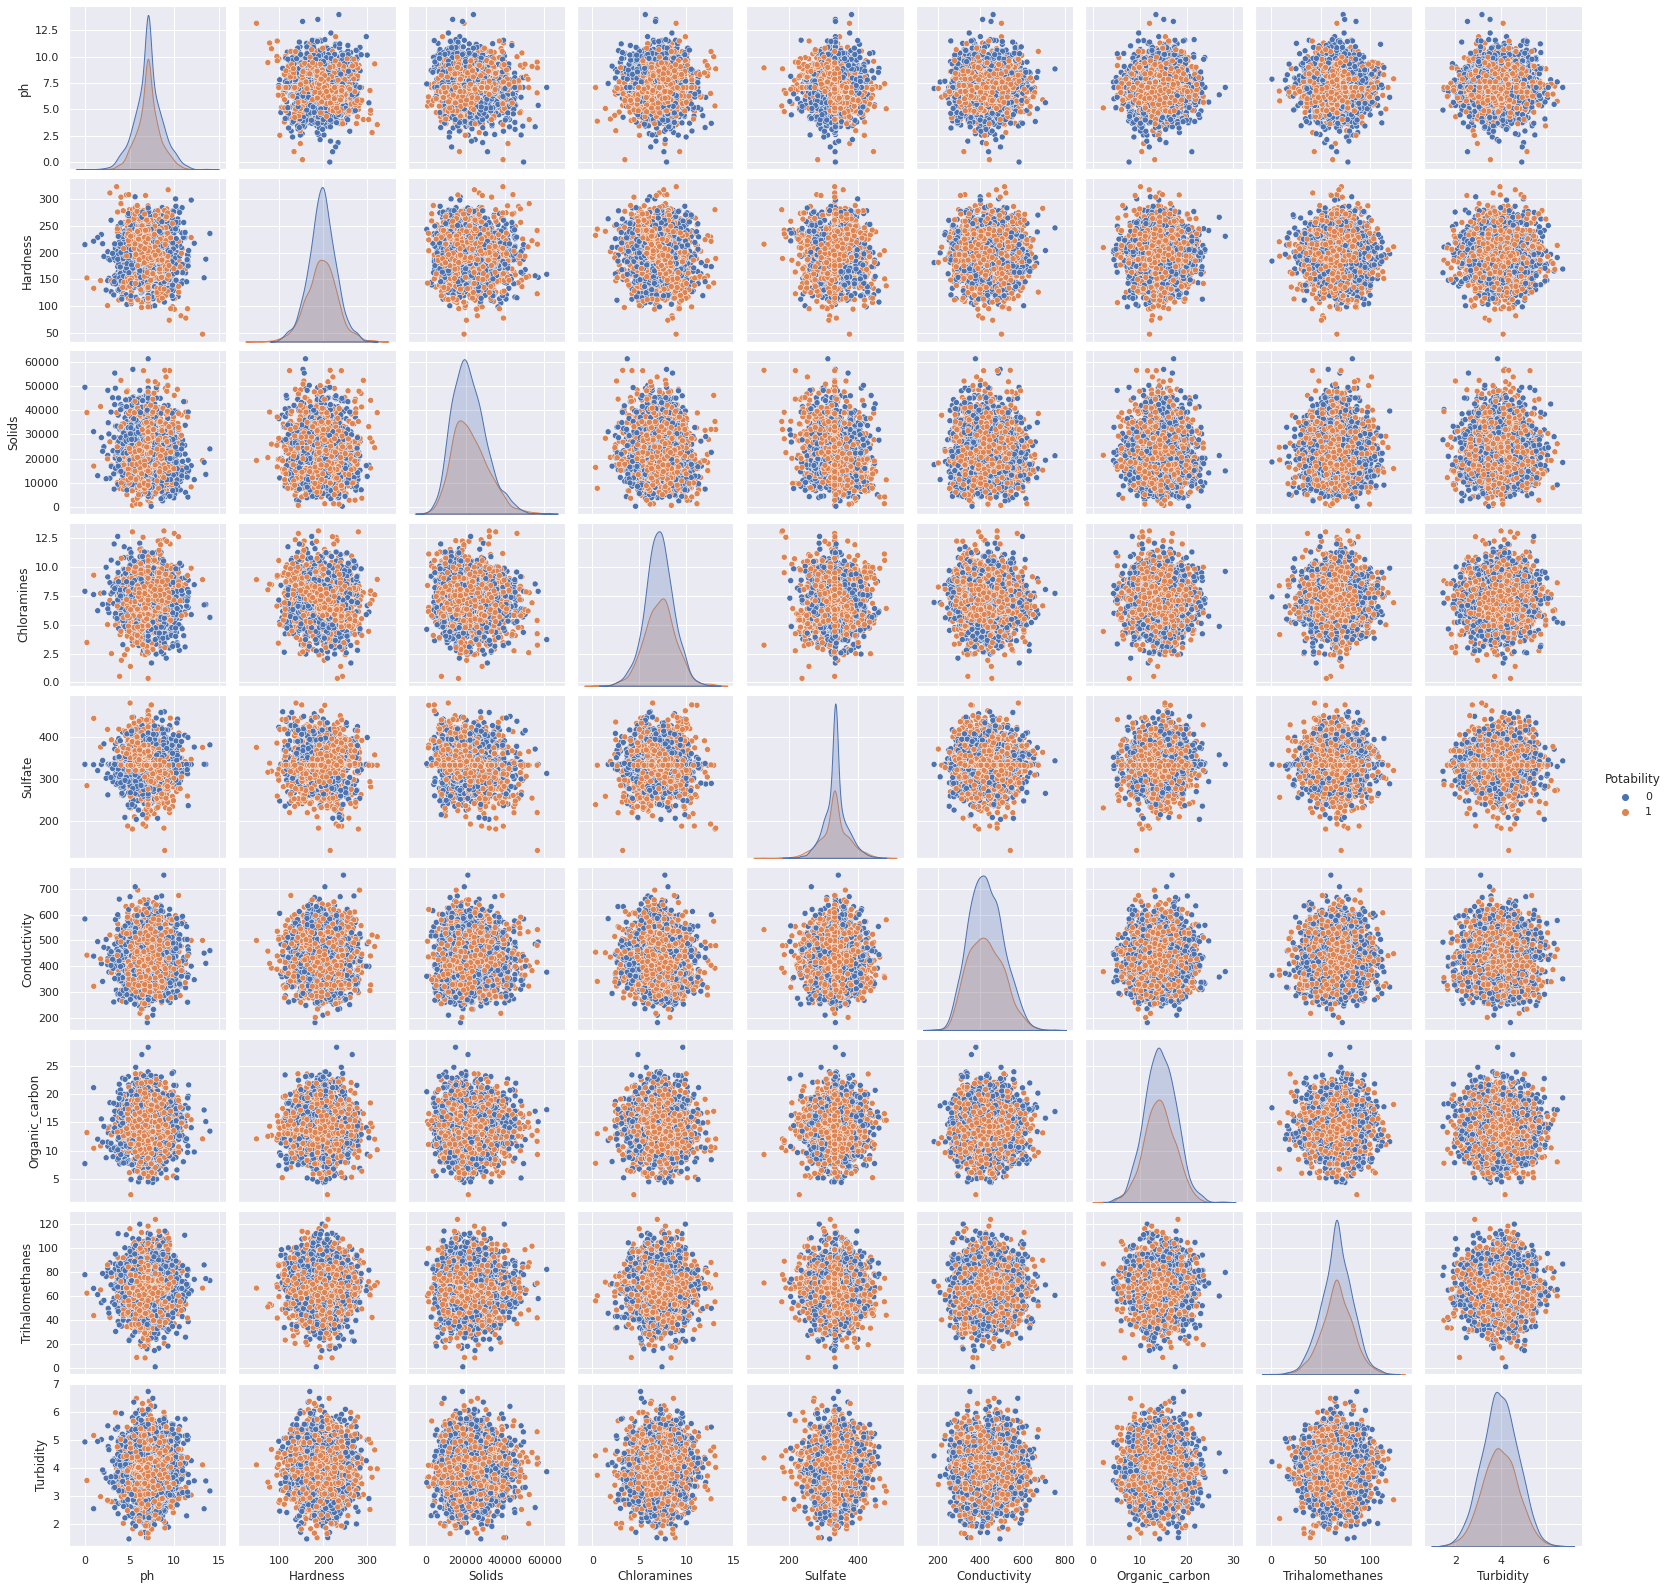

In [34]:
sns.set()

sns.pairplot(dataset, hue="Potability")

**Memplot Distribusi Setiap Variabel**

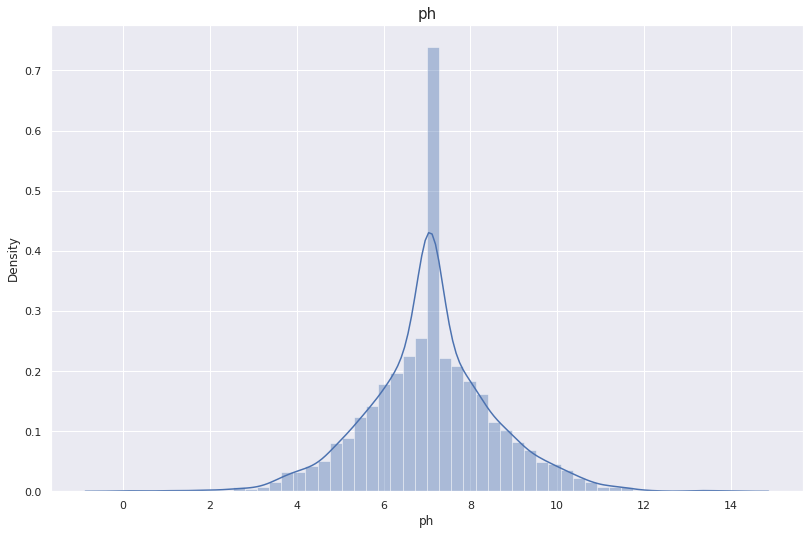

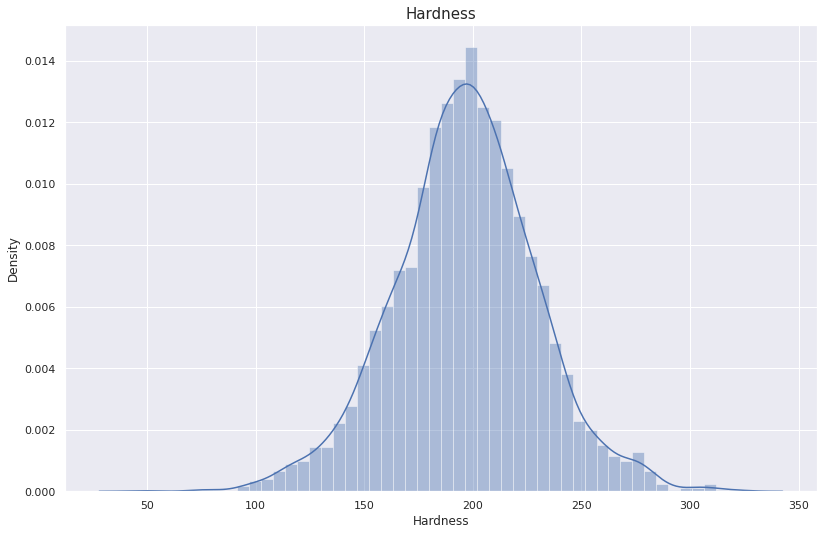

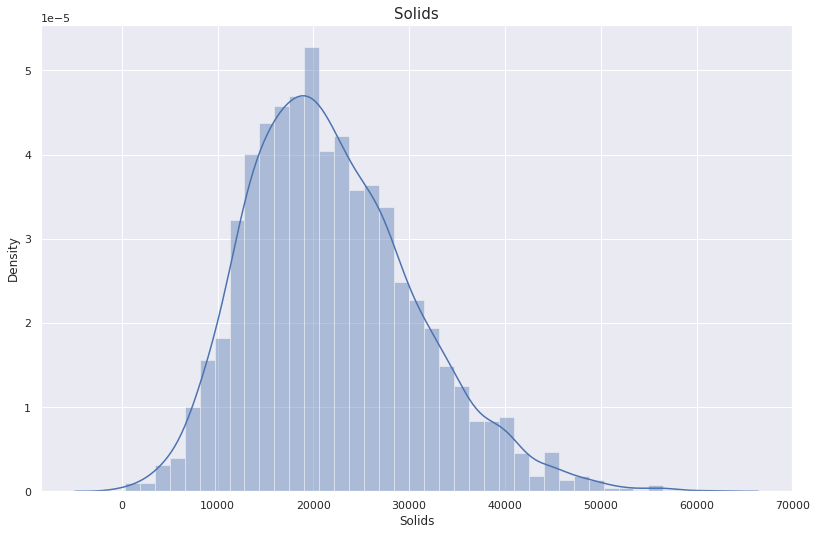

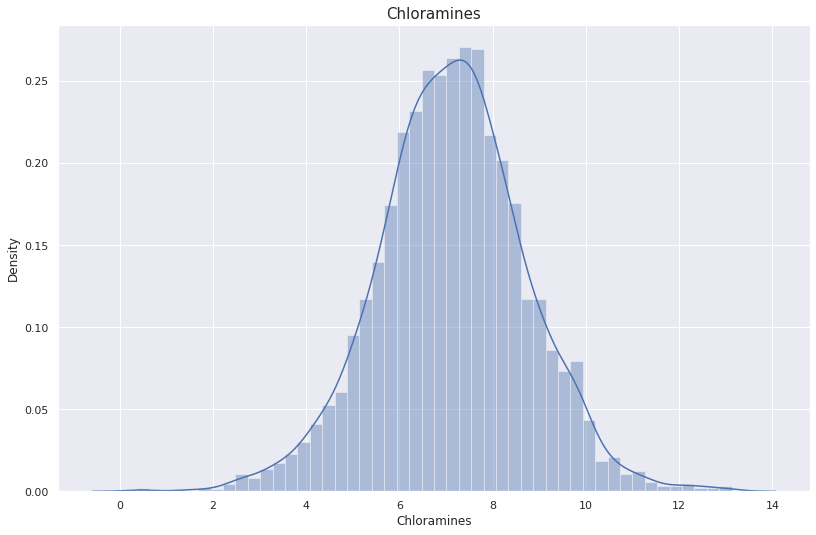

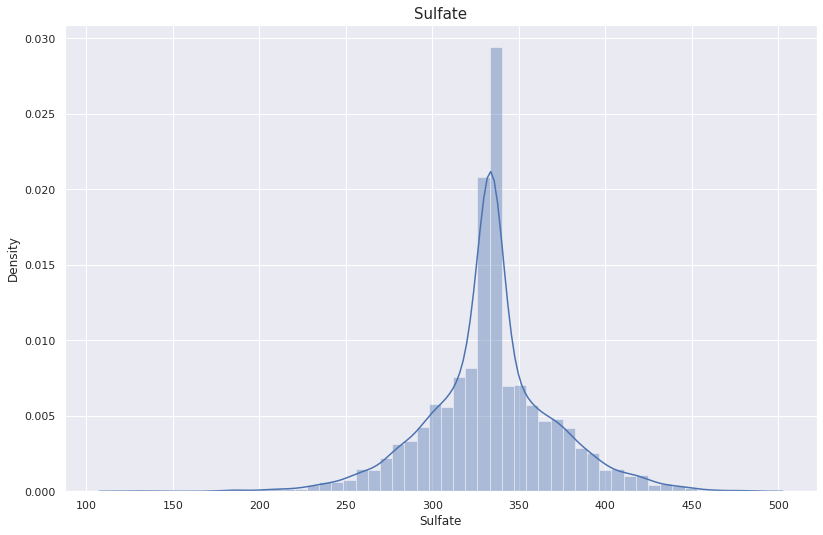

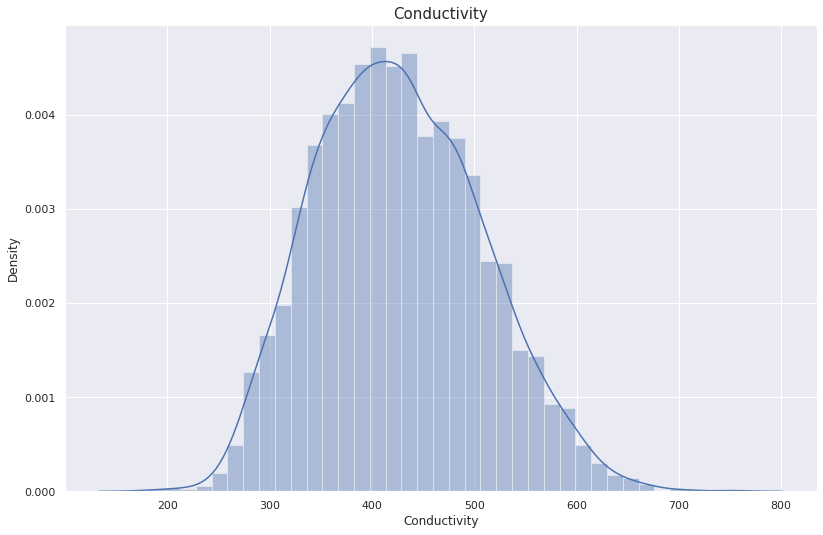

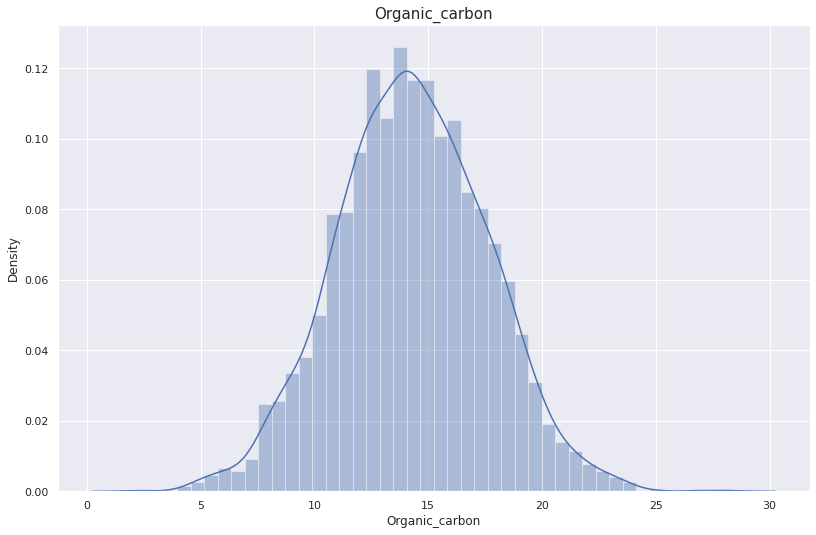

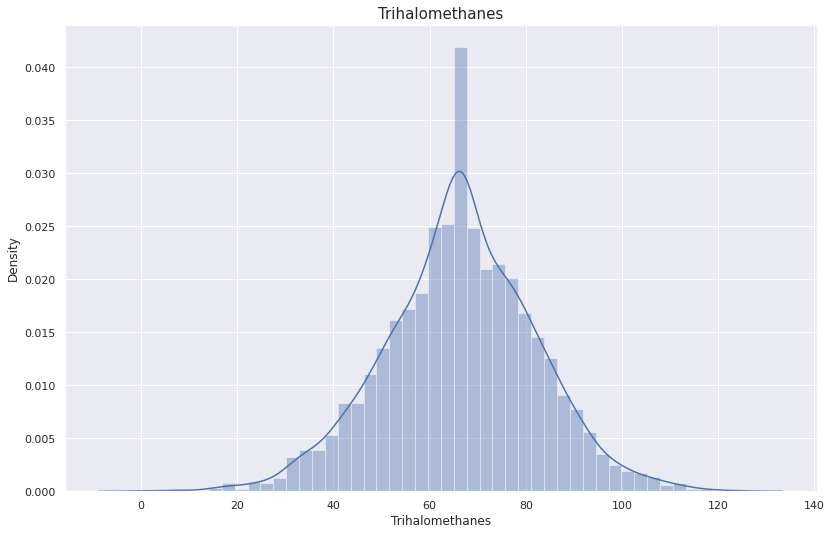

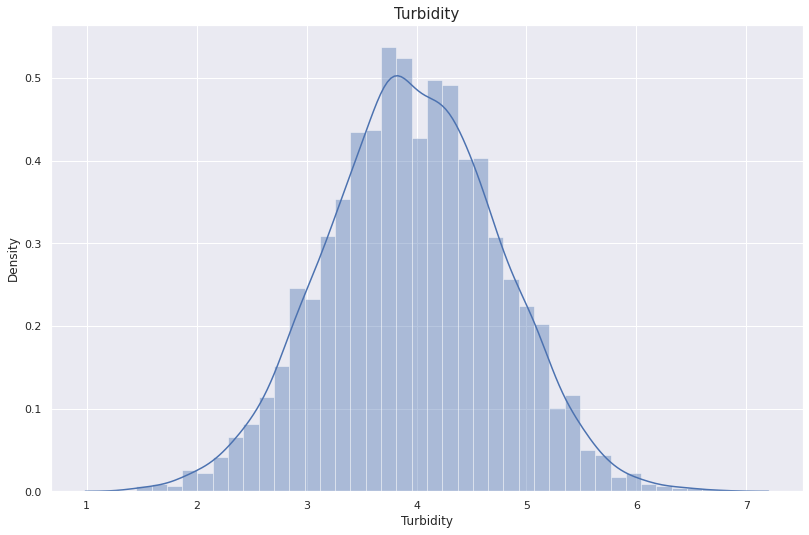

In [35]:
for col in dataset.drop("Potability", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.distplot(dataset[col])
    plt.title(f"{col}", size=15)
    plt.show()

In [37]:
labels = ['tidak bisa diminum','dapat diminum']
values = [dataset[dataset["Potability"]==0].shape[0], dataset[dataset["Potability"]==1].shape[0]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, title="Potability")])
fig.show()

Hubungan Antara Setiap Variabel dan Variabel Target (Potabilitas)

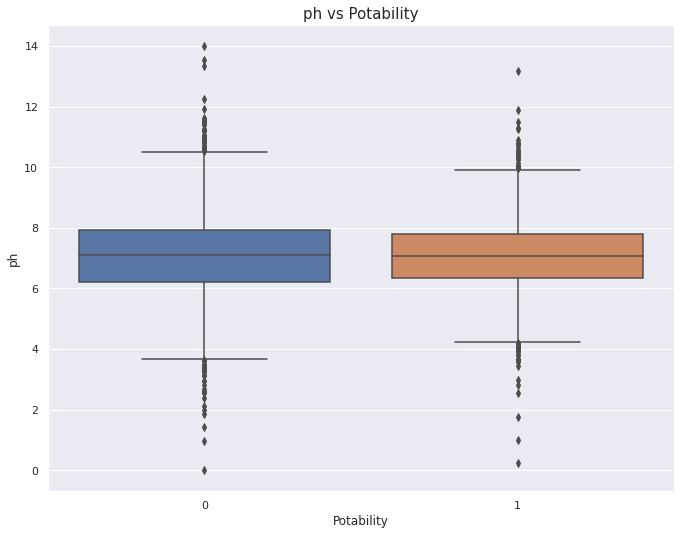

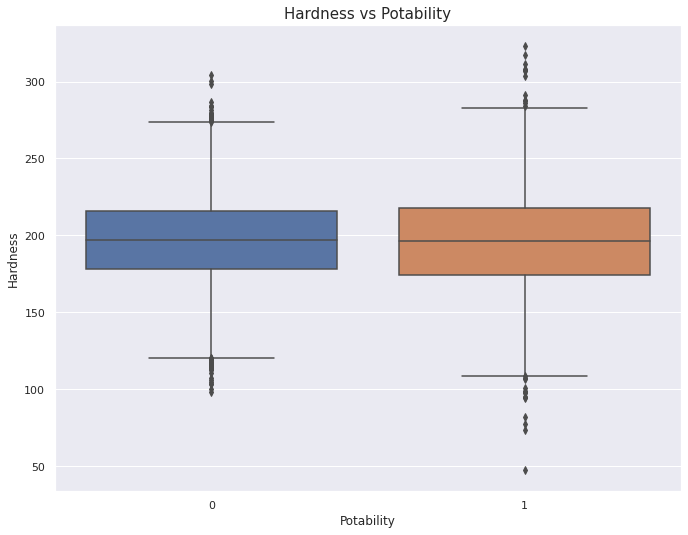

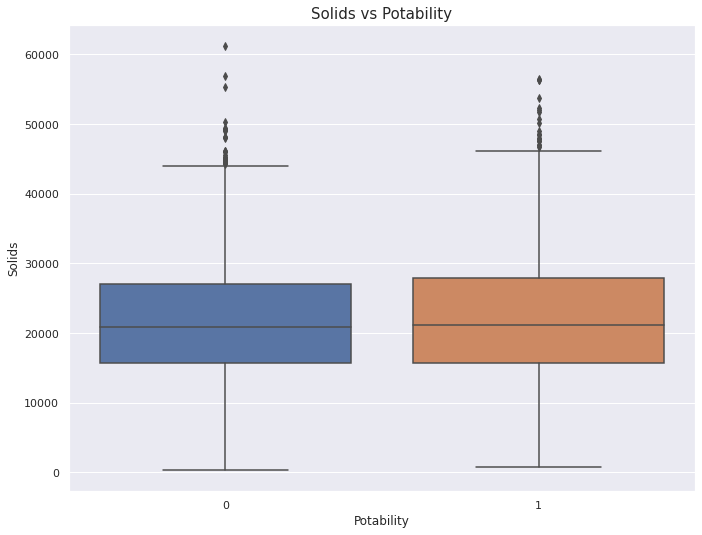

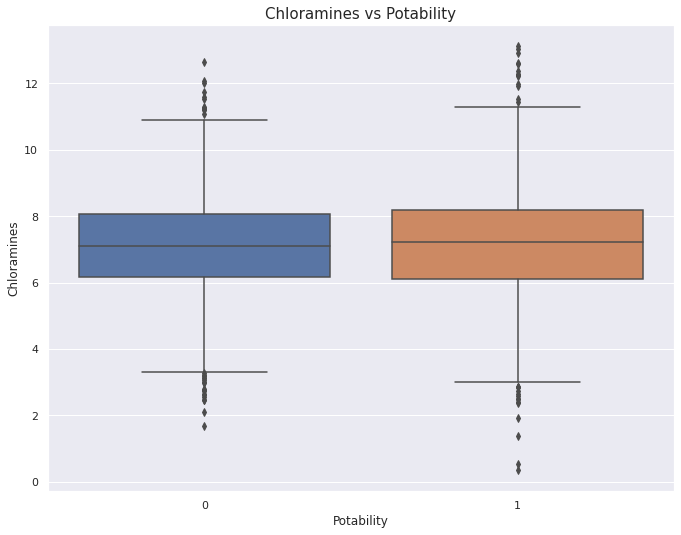

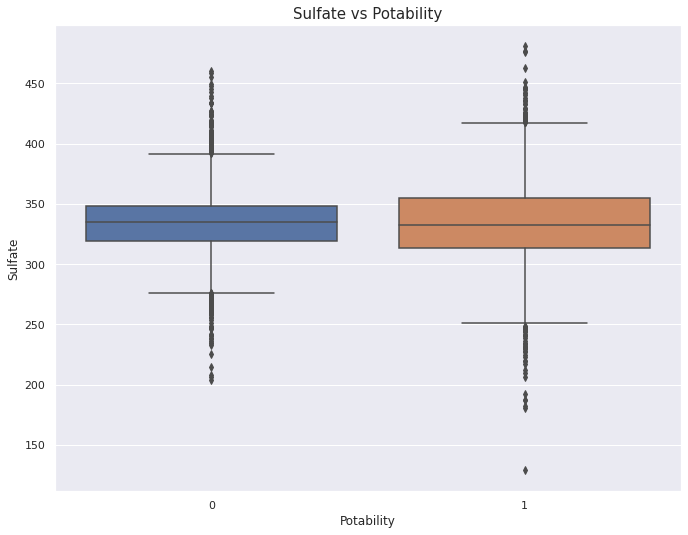

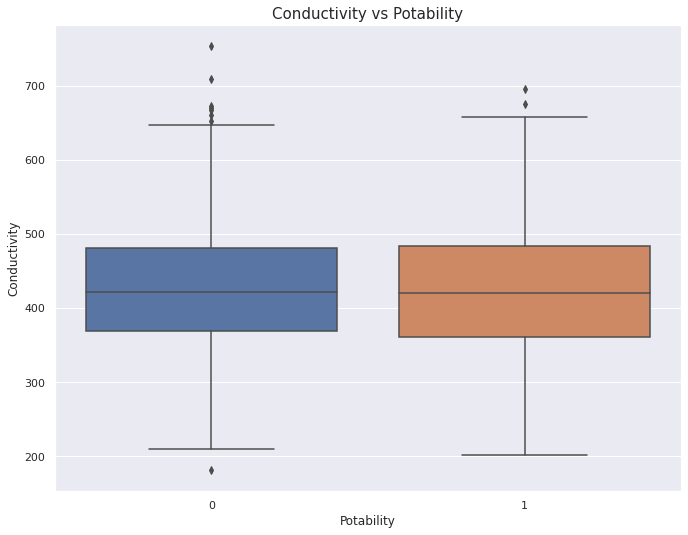

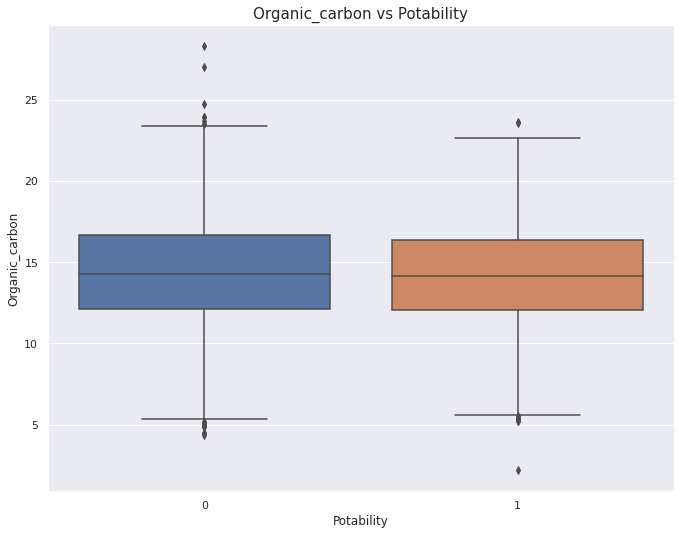

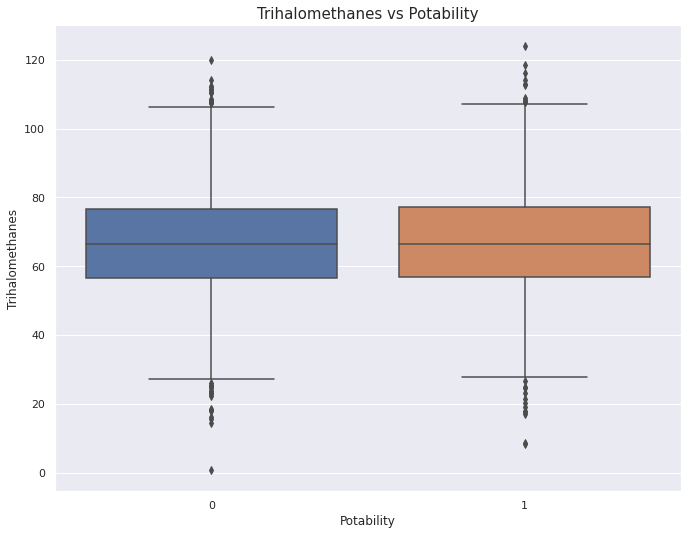

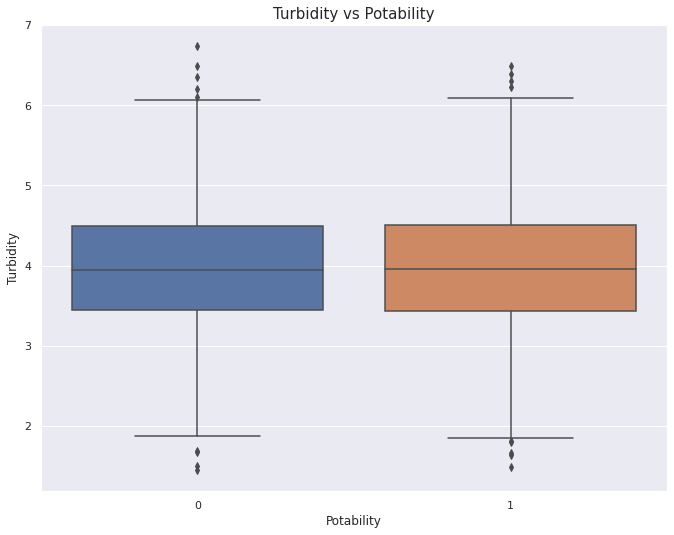

In [38]:
for col in dataset.drop("Potability", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(dataset["Potability"], dataset[col])
    plt.title(f"{col} vs Potability", size=15)
    plt.show()

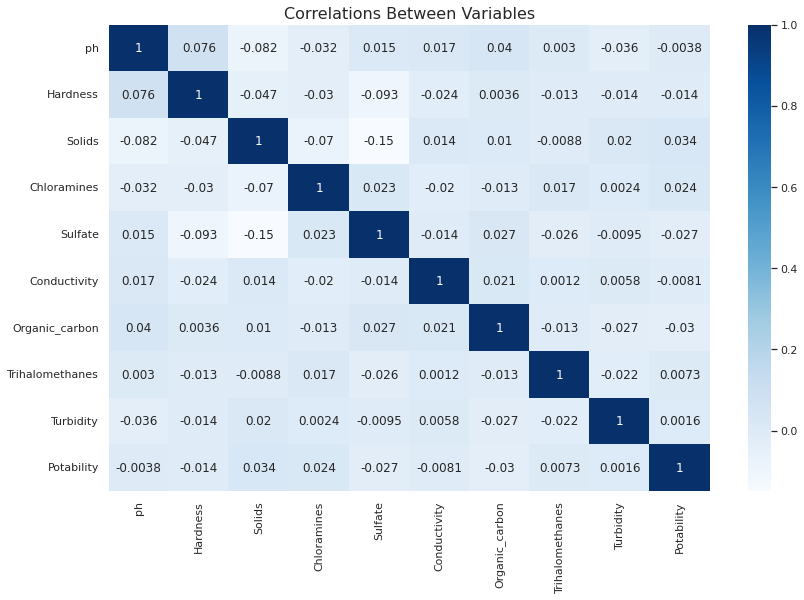

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# **Data Preprocessing**

X,y Split

In [47]:
X = dataset.drop("Potability", axis=1)
y = dataset["Potability"]

Standarisasi Data

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train-Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Machine Learning Models**

In [50]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [51]:
model_list = [("Logistic Regression", LogisticRegression(random_state=42)), 
              ("Random Forest", RandomForestClassifier(random_state=42)),
              ("LightGBM", LGBMClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=42)),
              ("XGBoost", XGBClassifier(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=42)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42))]

In [52]:
for name, clf in model_list:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    
    new_row = {"Model": name, "Accuracy Score": score}
    models = models.append(new_row, ignore_index=True)

In [53]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
1,Random Forest,0.824695
9,Bagging Classifier,0.806402
2,LightGBM,0.804878
4,XGBoost,0.801829
8,Decision Tree,0.746951
3,Support Vector Machines,0.699695
7,KNN,0.663110
6,Bernoulli Naive Bayes,0.632622
5,Gaussian Naive Bayes,0.631098
0,Logistic Regression,0.628049


In [54]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
    
    score = roc_auc_score(y_test, pred_prob[:, 1])
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC AUC Score: (%0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={"size": 15})
    plt.show()

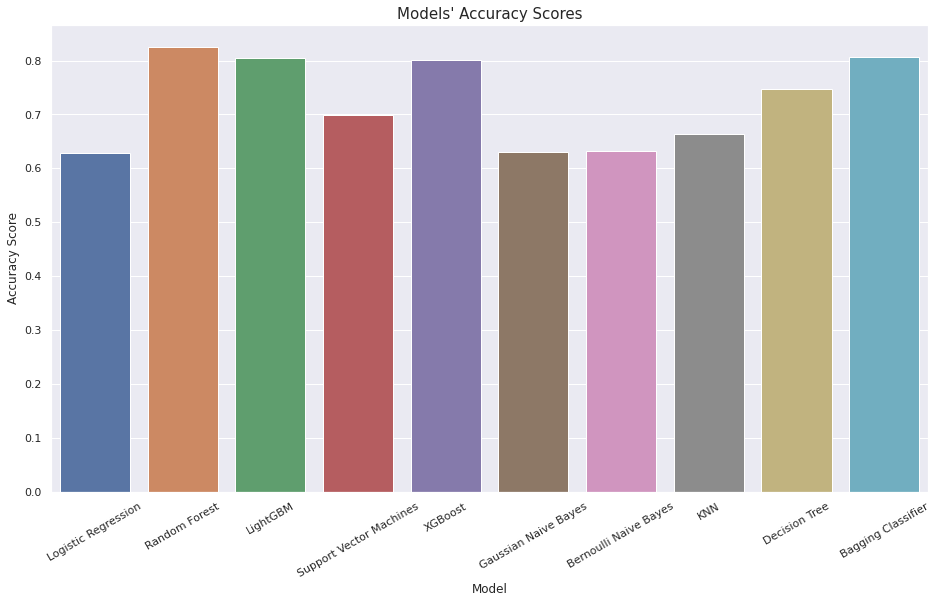

In [55]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

**Confusion Matrix and ROC Curve of Random Forest**

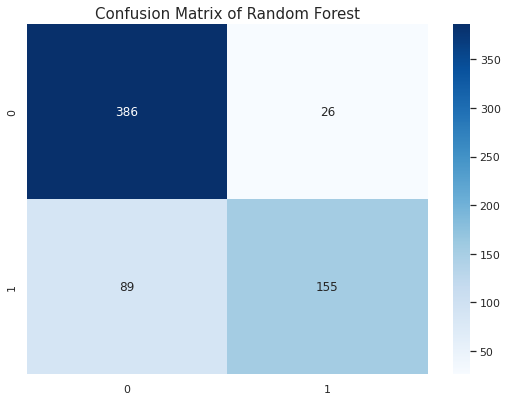

In [56]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

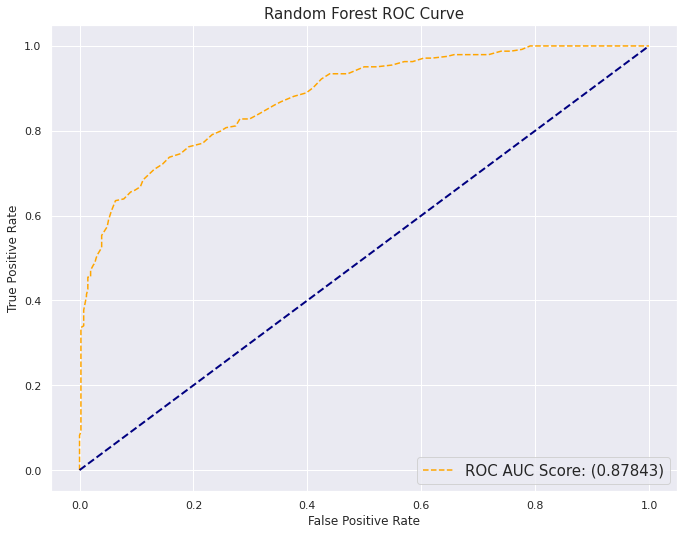

In [57]:
visualize_roc_auc_curve(rfc, "Random Forest")

Confusion Matrix and ROC Curve of LightGBM

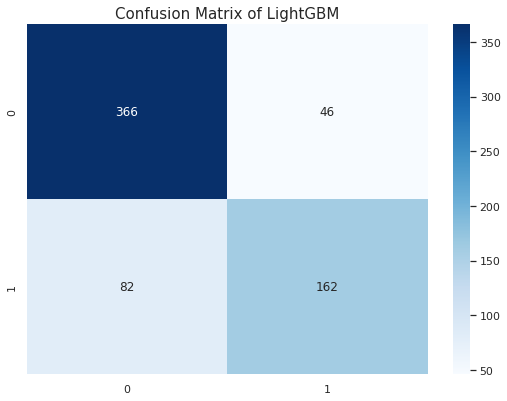

In [58]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of LightGBM", size=15)
plt.show()

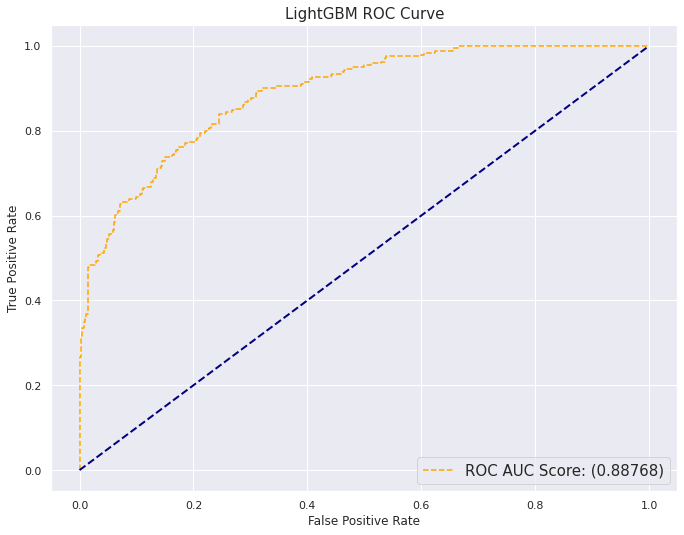

In [59]:
visualize_roc_auc_curve(lgbm, "LightGBM")

**Confusion Matrix and ROC Curve of Bagging Classifier**

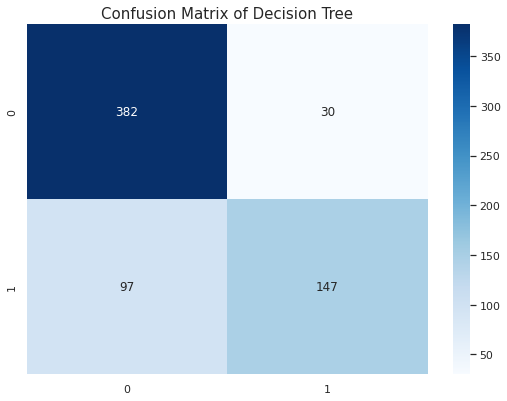

In [77]:
bag = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)
bag.fit(X_train, y_train)
predictions = bag.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Decision Tree", size=15)
plt.show()

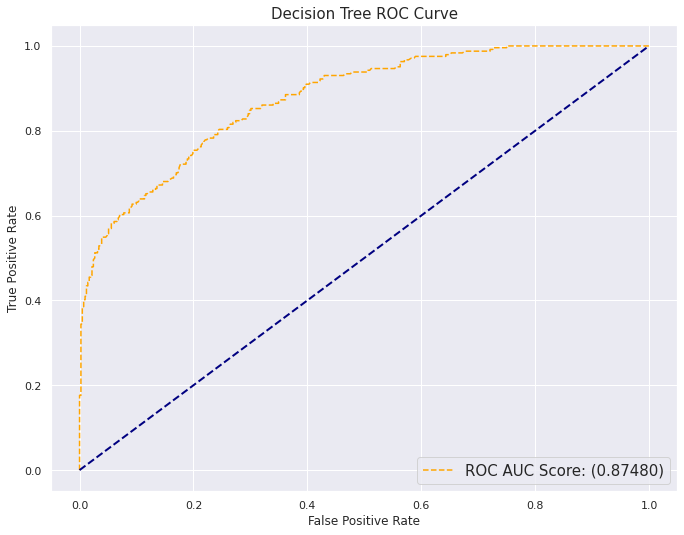

In [78]:
visualize_roc_auc_curve(bag, "Decision Tree")

# **Hyperparameter Tuning**

In [64]:
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

Tuning the LightGBM

In [65]:
param_grid_lgbm = param_grid = {'learning_rate': [0.01, 0.05, 0.1],
                                'n_estimators': [10, 50, 100, 150, 200],
                                'num_leaves': [6, 10, 16, 20, 31, 40],
                                'objective' : ['binary'],
                                "random_state": [42]}

grid_lgbm = GridSearchCV(LGBMClassifier(), param_grid_lgbm, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'num_leaves': [6, 10, 16, 20, 31, 40],
                         'objective': ['binary'], 'random_state': [42]},
             scoring='accuracy')

In [66]:
lgbm_params = grid_lgbm.best_params_
lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LightGBM", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.801829268292683


Tuning the Random Forest

In [67]:
param_grid_rfc = {"min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "n_estimators" :[100, 200, 500],
                  "random_state": [42]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring='accuracy')

In [68]:
rfc_params = grid_rfc.best_params_
rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Random Forest", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7926829268292683


Tuning the Decision Tree

In [69]:
param_grid_dt = {'criterion':['gini','entropy'],
                  'max_depth': np.arange(3, 50)}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [70]:
dt_params = grid_dt.best_params_
dt = DecisionTreeClassifier(**dt_params)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "Decision Tree Classifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.7652439024390244


# **Model Comparison After Hyperparameter Tuning**

In [71]:
tuned_models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
0,LightGBM,0.801829
1,Random Forest,0.792683
2,Decision Tree Classifier,0.765244


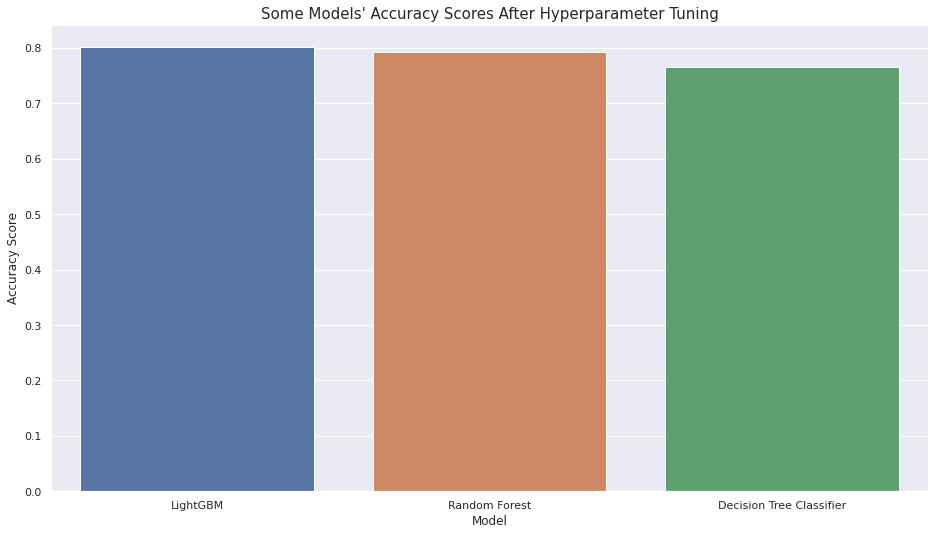

In [72]:
plt.figure(figsize=(14, 8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["Accuracy Score"])
plt.title("Some Models' Accuracy Scores After Hyperparameter Tuning", size=15)
plt.show()